In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.loc["1968"]

,Production
Date,
1968-01-01,717
1968-02-01,696
1968-03-01,775
1968-04-01,796
1968-05-01,858
1968-06-01,826
1968-07-01,783
1968-08-01,740
1968-09-01,701


In [7]:
df.loc["1968"].mean()

Production    748.833333
dtype: float64

In [8]:
df.loc["1970-04":"1970-08"]

,Production
Date,
1970-04-01,824
1970-05-01,886
1970-06-01,859
1970-07-01,819
1970-08-01,783


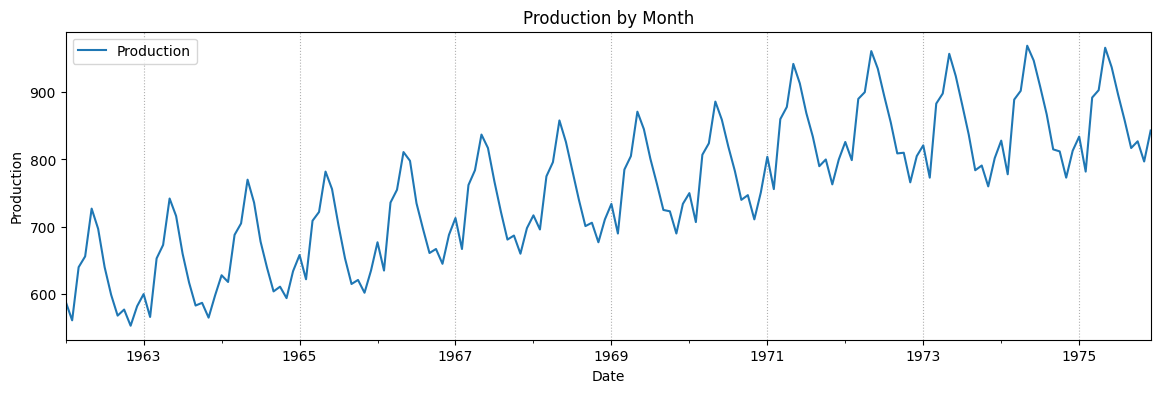

In [9]:
df.plot(figsize=(14, 4), title="Production by Month", ylabel="Production")
plt.grid(axis="x", ls=":")

In [10]:
result = seasonal_decompose(df)

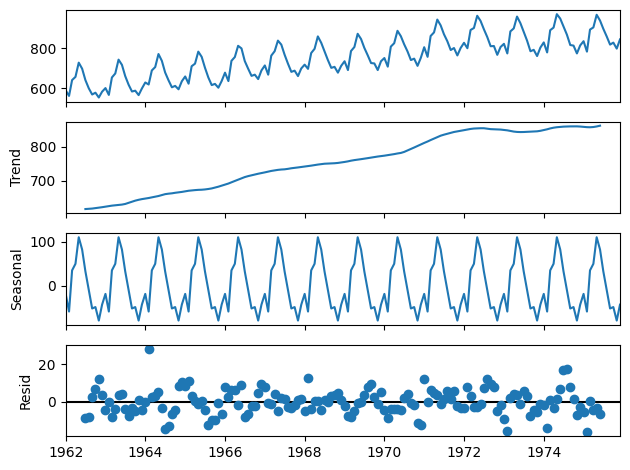

In [11]:
result.plot();

In [12]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [13]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [14]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [15]:
train.min(), train.max()

(Production    553
 dtype: int64,
 Production    969
 dtype: int64)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [20]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [21]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [22]:
inp, out = generator[0]

In [23]:
inp

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154]]])

In [24]:
out

array([[0.11298077]])

In [25]:
inp2, out2 = generator[1]

In [26]:
inp2

array([[[0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077]]])

In [27]:
out2

array([[0.03125]])

In [28]:
inp.shape

(1, 12, 1)

In [29]:
out.shape

(1, 1)

In [30]:
model = Sequential([
    LSTM(2000, activation="relu", input_shape=((12, 1))),
    Dense(1)
])

In [31]:
model.compile(optimizer="adam", loss="mse")

In [32]:
model.fit(generator, epochs=30)

Epoch 1/30

144/144 [==============================] - 54s 365ms/step - loss: 0.0432
Epoch 2/30
144/144 [==============================] - 51s 352ms/step - loss: 0.0269
Epoch 3/30
144/144 [==============================] - 51s 353ms/step - loss: 0.0050
Epoch 4/30
144/144 [==============================] - 51s 352ms/step - loss: 0.0036
Epoch 5/30
144/144 [==============================] - 51s 355ms/step - loss: 0.0048
Epoch 6/30
144/144 [==============================] - 51s 354ms/step - loss: 0.0024
Epoch 7/30
144/144 [==============================] - 51s 357ms/step - loss: 0.0030
Epoch 8/30
144/144 [==============================] - 51s 354ms/step - loss: 0.0023
Epoch 9/30
144/144 [==============================] - 51s 357ms/step - loss: 0.0030
Epoch 10/30
144/144 [==============================] - 52s 359ms/step - loss: 0.0027
Epoch 11/30
144/144 [==============================] - 51s 356ms/step - loss: 0.0020
Epoch 12/30
144/144 [==============================] - 51s 355ms/step - l

In [33]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [34]:
last_train_batch = last_train_batch.reshape((1, 12, 1))

In [35]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [38]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 67ms/step


array([0.69734085], dtype=float32)

In [37]:
scaled_test[0]

array([0.67548077])

In [39]:
test_pred = []

In [40]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [41]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :,], [[current_pred]], axis=1)

1/1 [==============================] - 0s 66ms/step


In [42]:
test_pred

[array([0.69734085], dtype=float32),
 array([0.6064867], dtype=float32),
 array([0.81245446], dtype=float32),
 array([0.8527438], dtype=float32),
 array([0.96924794], dtype=float32),
 array([0.9401595], dtype=float32),
 array([0.8645929], dtype=float32),
 array([0.7871815], dtype=float32),
 array([0.6830264], dtype=float32),
 array([0.66826266], dtype=float32),
 array([0.5907504], dtype=float32),
 array([0.66486627], dtype=float32)]

In [43]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [44]:
true_pred = scaler.inverse_transform(test_pred)

In [45]:
true_pred

array([[843.09379196],
       [805.2984581 ],
       [890.98105621],
       [907.74142265],
       [956.20714188],
       [944.10635185],
       [912.67065048],
       [880.46750259],
       [837.13897133],
       [830.99726677],
       [798.75216484],
       [829.58436775]])

In [46]:
test["Prediction"] = true_pred

In [47]:
test

,Production,Prediction
Date,,
1975-01-01,834,843.093792
1975-02-01,782,805.298458
1975-03-01,892,890.981056
1975-04-01,903,907.741423
1975-05-01,966,956.207142
1975-06-01,937,944.106352
1975-07-01,896,912.670650
1975-08-01,858,880.467503
1975-09-01,817,837.138971


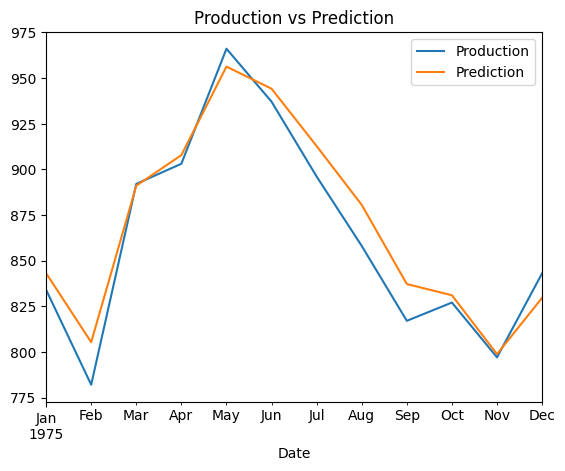

In [48]:
test.plot(title="Production vs Prediction")
plt.show()

In [53]:
rmse = root_mean_squared_error(test["Production"], test["Prediction"])
rmse

13.486844461997816

In [52]:
test.mean()

Production    862.666667
Prediction    869.753262
dtype: float64

In [54]:
lower = test["Production"].mean() - rmse
upper = test["Prediction"].mean() + rmse

In [55]:
lower, upper

(849.1798222046688, 883.2401066639428)